### Importing Important Library

In [42]:
# pip install GoogleNews

In [3]:
import pandas as pd
from GoogleNews import GoogleNews
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### Getting news about  Federal Bank using GoogleNews 

In [4]:
# Creating google news object
googlenews = GoogleNews()

In [5]:
#choose language
googlenews = GoogleNews(lang='en')

In [6]:
#Searching the news about federal bank.
googlenews=GoogleNews(start='05/01/2021',end='05/31/2020') #googlenews object
googlenews.search('Federal Bank India') #searchword
for i in range(1,20): #looping over and getting the news till 20 pages.
    googlenews.getpage(i)
    result=googlenews.result()
    df1=pd.DataFrame(result)

HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests
HTTP Error 429: Too Many Requests


In [7]:
df1.head()

,title,media,date,datetime,desc,link,img
0,"​Tata Communications, Federal Bank: Top Stocks...",News18,20-Jan-2021,None,The Indian stock market is expected to open wi...,https://www.news18.com/news/business/tata-comm...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Stock market update: Nifty Bank index jumps ov...,The Economic Times,16-Oct-2020,None,", Tata Motors, Ashok Leyland and Federal Bank ...",https://economictimes.indiatimes.com/markets/s...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,"Banks, financials lift Sensex by 254 points; N...",Mint,th · 16-Oct-2020,None,The Competition Commission of India is investi...,https://www.livemint.com/market/stock-market-n...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,"Stock Market Highlights: Sensex, Nifty ends hi...",CNBCTV18,16-Oct-2020,None,Stock Market Highlights: Indian equity benchma...,https://www.cnbctv18.com/market/stock-market-l...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,"M&M Fin, Federal Bank: Top financial picks pos...",Business Standard,14-Sep-2020,None,Mid- and small-cap banking stocks such as City...,https://www.business-standard.com/article/mark...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [8]:
df1['title'][1]

'Stock market update: Nifty Bank index jumps over 2%; Federal Bank climbs 3%'

In [9]:
df1['desc'][1]

', Tata Motors, Ashok Leyland and Federal Bank were among the most traded shares on the NSE. Shares of Poly Medicure, Amber Enterprises India Ltd., JSW ...'

In [10]:
# Text data of Review
X = df1['desc']

### Creating the target variable  using Textblob.

In [11]:
# UDF to find sentiment polarity of the reviews
def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else:
        return 'Negative'  

In [12]:
# creating dictionary which will contain both the review and the sentiment of the review
final_dictionary = []
for text in X:
    dictionary_sentiment = {}
    dictionary_sentiment['News'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:5])

[{'News': 'The Indian stock market is expected to open with higher points as the SGX Nifty indicated a positive opening for the domestic market as it was trading 11 points ...', 'Sentiment': 'Positive'}, {'News': ', Tata Motors, Ashok Leyland and Federal Bank were among the most traded shares on the NSE. Shares of Poly Medicure, Amber Enterprises India Ltd., JSW ...', 'Sentiment': 'Positive'}, {'News': "The Competition Commission of India is investigating JK Tyre & Industries Ltd after ... Federal Bank's September quarter net profit fell to 3.08 billion rupees from ...", 'Sentiment': 'Neutral'}, {'News': 'Stock Market Highlights: Indian equity benchmark indices ended the day ... Federal Bank closes with minor gains despite reporting a stable set of earnings. 12.', 'Sentiment': 'Negative'}, {'News': 'Mid- and small-cap banking stocks such as City Union Bank, Federal Bank, and ... the Securities and Exchange Board of India had said in its circular on Friday.', 'Sentiment': 'Neutral'}]


In [13]:
df=pd.DataFrame(final_dictionary)

In [14]:
df.head()

,News,Sentiment
0,The Indian stock market is expected to open wi...,Positive
1,", Tata Motors, Ashok Leyland and Federal Bank ...",Positive
2,The Competition Commission of India is investi...,Neutral
3,Stock Market Highlights: Indian equity benchma...,Negative
4,Mid- and small-cap banking stocks such as City...,Neutral


In [15]:
df['Sentiment'].value_counts()

Positive    64
Neutral     55
Negative    21
Name: Sentiment, dtype: int64

In [16]:
# Target Variable
Y=df['Sentiment']

### Data Cleaning

In [17]:
# UDF to clean the news desc
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = "".join([char for char in text if char not in string.punctuation])
    return text

X.head()

0    The Indian stock market is expected to open wi...
1    , Tata Motors, Ashok Leyland and Federal Bank ...
2    The Competition Commission of India is investi...
3    Stock Market Highlights: Indian equity benchma...
4    Mid- and small-cap banking stocks such as City...
Name: desc, dtype: object

In [18]:
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [19]:
# applying clean_text function defined above to remove punctuation, strip extra spaces and convert each word to lowercase
X = X.apply(lambda y: clean_text(y))

X.head()

0    the indian stock market is expected to open wi...
1     tata motors ashok leyland and federal bank we...
2    the competition commission of india is investi...
3    stock market highlights indian equity benchmar...
4    mid and smallcap banking stocks such as city u...
Name: desc, dtype: object

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
def get_noun_tags(tokens):
    tokens = word_tokenize(tokens)
    return [word for (word, pos) in nltk.pos_tag(tokens) if(pos !='NN')  and pos != 'NNP' and pos != 'NNPS' and pos != 'NNS']

In [21]:
X.apply(lambda x:clean_text(x))

0      the indian stock market is expected to open wi...
1      tata motors ashok leyland and federal bank wer...
2      the competition commission of india is investi...
3      stock market highlights indian equity benchmar...
4      mid and smallcap banking stocks such as city u...
                             ...                        
135    london a consortium of indian banks led by the...
136    a key question for fed chair and his colleague...
137    analysts at morgan stanley have recently turne...
138    the reserve bank of india rbi on friday restri...
139    shetty has accused bank of baroda and federal ...
Name: desc, Length: 140, dtype: object

### Creating Model Input Vectors

In [22]:
### Coverting reviews to tokens
tokens_vect = CountVectorizer(stop_words='english')

token_dtm = tokens_vect.fit_transform(X)

tokens_vect.get_feature_names()

token_dtm.toarray()

token_dtm.toarray().shape

len(tokens_vect.get_feature_names())

pd.DataFrame(token_dtm.toarray(),columns = tokens_vect.get_feature_names())

print(token_dtm)

  (0, 463)	1
  (0, 906)	1
  (0, 581)	2
  (0, 361)	1
  (0, 654)	1
  (0, 432)	1
  (0, 699)	2
  (0, 856)	1
  (0, 637)	1
  (0, 467)	1
  (0, 706)	1
  (0, 655)	1
  (0, 322)	1
  (0, 953)	1
  (0, 6)	1
  (1, 924)	1
  (1, 616)	1
  (1, 158)	1
  (1, 544)	1
  (1, 375)	1
  (1, 174)	1
  (1, 952)	1
  (1, 863)	2
  (1, 641)	1
  (1, 703)	1
  :	:
  (138, 174)	2
  (138, 460)	1
  (138, 232)	1
  (138, 399)	1
  (138, 794)	1
  (138, 145)	1
  (138, 760)	1
  (138, 363)	1
  (138, 797)	1
  (138, 167)	1
  (138, 785)	2
  (138, 827)	1
  (138, 252)	1
  (139, 375)	1
  (139, 174)	2
  (139, 177)	1
  (139, 418)	1
  (139, 246)	1
  (139, 865)	2
  (139, 354)	1
  (139, 401)	1
  (139, 121)	1
  (139, 241)	1
  (139, 139)	1
  (139, 336)	1


In [23]:
# creating a dataframe which shows the count of how many times a word is coming in the corpus
count_dtm_dataframe = pd.DataFrame(np.sum(token_dtm.toarray(),axis=0),tokens_vect.get_feature_names()).reset_index()
count_dtm_dataframe.columns =['Word','Count']

count_dtm_dataframe[50:150].head()

,Word,Count
50,224,1
51,23,4
52,230,1
53,2312,1
54,232,1


In [24]:
#adding sentiment column which shows sentiment polarity of each word
sentiment_word = []
for word in count_dtm_dataframe['Word']:
    sentiment_word.append(sentiment_review(word))
count_dtm_dataframe['Sentiment'] = sentiment_word

count_dtm_dataframe[100:150].head(10)

# separating positive words
positive_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

positive_words_df.head(20)

,Word,Count,Sentiment
635,new,7,Positive
813,rose,7,Positive
983,wants,3,Positive
806,right,3,Positive
432,higher,2,Positive
704,popular,2,Positive
713,precious,2,Positive
531,large,2,Positive
440,hot,2,Positive
840,secure,2,Positive


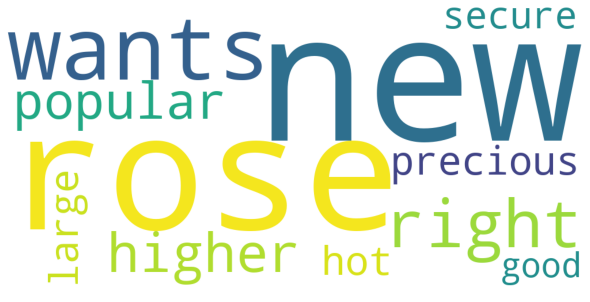

In [25]:

# plotting word cloud of 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(' '.join(positive_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

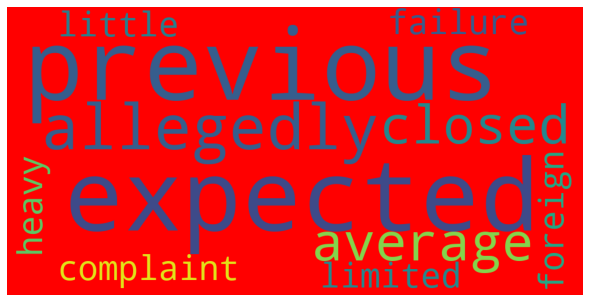

In [26]:
# separating negative words
negative_words_df= count_dtm_dataframe.loc[count_dtm_dataframe['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

negative_words_df.head(10)

# plotting word cloud of 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500,background_color='red').generate(' '.join(negative_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


In [27]:
### Splitting the data into train and test

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state = 123, test_size = 0.2)  

print('No.of observations in train_X: ',len(train_X), '| No.of observations in test_X: ',len(test_X))
print('No.of observations in train_Y: ',len(train_Y), '| No.of observations in test_Y: ',len(test_Y))

No.of observations in train_X:  112 | No.of observations in test_X:  28
No.of observations in train_Y:  112 | No.of observations in test_Y:  28


In [28]:
### Feature generation using DTM

vect = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

train_X_fit = vect.fit(train_X)
train_X_dtm = vect.transform(train_X)
test_X_dtm = vect.transform(test_X)

print(train_X_dtm)

print(test_X_dtm)

vect.get_feature_names()

print('No.of features for are',len(vect.get_feature_names()))

  (0, 12)	1
  (0, 54)	1
  (0, 61)	1
  (0, 90)	1
  (0, 99)	1
  (0, 150)	1
  (0, 215)	1
  (0, 257)	1
  (0, 326)	1
  (0, 446)	1
  (0, 456)	1
  (0, 567)	1
  (0, 662)	1
  (0, 724)	1
  (0, 807)	1
  (0, 892)	1
  (1, 34)	1
  (1, 56)	1
  (1, 102)	1
  (1, 150)	1
  (1, 234)	1
  (1, 273)	1
  (1, 307)	1
  (1, 326)	1
  (1, 403)	1
  :	:
  (110, 546)	1
  (110, 673)	1
  (110, 704)	1
  (110, 729)	1
  (111, 142)	1
  (111, 150)	3
  (111, 152)	2
  (111, 153)	1
  (111, 154)	1
  (111, 159)	1
  (111, 233)	1
  (111, 261)	1
  (111, 326)	1
  (111, 397)	1
  (111, 403)	1
  (111, 406)	1
  (111, 465)	1
  (111, 506)	1
  (111, 566)	1
  (111, 589)	1
  (111, 682)	1
  (111, 700)	1
  (111, 735)	1
  (111, 739)	1
  (111, 843)	1
  (0, 150)	2
  (0, 326)	1
  (0, 329)	1
  (0, 331)	1
  (0, 403)	1
  (0, 673)	1
  (0, 704)	1
  (0, 735)	1
  (1, 152)	1
  (1, 245)	1
  (1, 326)	1
  (1, 560)	1
  (1, 645)	1
  (1, 660)	1
  (1, 757)	1
  (1, 777)	1
  (1, 892)	2
  (1, 897)	1
  (2, 150)	2
  (2, 152)	1
  (2, 326)	1
  (2, 344)	1
  (2, 406)	1
  

In [29]:
train_X_dtm_df = pd.DataFrame(train_X_dtm.toarray(),columns=vect.get_feature_names())

train_X_dtm_df.head()

,006,0210,10,1000,10000,11,1143,12,1200,1212,...,workers,worst,worth,year,yearonyear,years,yes,york,yoy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Finding how many times a term is used in corpus
train_dtm_freq = np.sum(train_X_dtm_df,axis=0)

train_dtm_freq.head(20)

006      1
0210     1
10       3
1000     1
10000    1
11       3
1143     1
12       4
1200     1
1212     1
124      1
1244     1
1249     3
126      1
13       2
1307     1
1409     1
1433     1
14509    1
14825    1
dtype: int64

In [31]:
vect_tdm = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

train_X_tdm = vect_tdm.fit_transform(train_X)
test_X_tdm = vect.transform(test_X)

print(train_X_tdm)

print(test_X_tdm)

vect_tdm.get_feature_names()

print('No.of features for are',len(vect_tdm.get_feature_names()))

  (0, 456)	0.2909465205347848
  (0, 54)	0.31643245339902193
  (0, 215)	0.24737803053274635
  (0, 892)	0.22929547339494502
  (0, 90)	0.31643245339902193
  (0, 807)	0.22189209766850926
  (0, 567)	0.24737803053274635
  (0, 446)	0.22929547339494502
  (0, 12)	0.2728639633969835
  (0, 257)	0.22929547339494502
  (0, 61)	0.31643245339902193
  (0, 99)	0.31643245339902193
  (0, 724)	0.18978361954723255
  (0, 662)	0.24737803053274635
  (0, 150)	0.08075345848078902
  (0, 326)	0.08535473489906377
  (1, 34)	0.26622173222757595
  (1, 450)	0.28064776074135456
  (1, 56)	0.32545909825082564
  (1, 716)	0.28064776074135456
  (1, 403)	0.10345493529790306
  (1, 234)	0.32545909825082564
  (1, 696)	0.29924614620062573
  (1, 581)	0.29924614620062573
  (1, 307)	0.25443480869115465
  :	:
  (110, 673)	0.2226767576414108
  (110, 403)	0.10989709036051837
  (110, 150)	0.2646870934894688
  (110, 326)	0.09325626056157066
  (111, 700)	0.24964899185975312
  (111, 154)	0.24964899185975312
  (111, 159)	0.24964899185975312

In [32]:
# creating dataframe to to see which features are present in the documents
train_X_tdm_df = pd.DataFrame(train_X_tdm.toarray(),columns=vect_tdm.get_feature_names())

train_X_tdm_df.head()

test_X_tdm_df = pd.DataFrame(test_X_tdm.toarray(),columns=vect_tdm.get_feature_names())

test_X_tdm_df.head()

# Finding how many times a term is used in test corpus
test_tdm_freq = np.sum(test_X_tdm_df,axis=0)

test_tdm_freq.head(20)


006      0
0210     0
10       1
1000     0
10000    0
11       1
1143     0
12       0
1200     0
1212     0
124      0
1244     0
1249     0
126      0
13       0
1307     0
1409     0
1433     0
14509    0
14825    0
dtype: int64

Accuracy on train:  1.0
Accuracy on test:  0.5357142857142857
F1 Score on train:  1.0
F1 Score on test:  0.49567099567099565


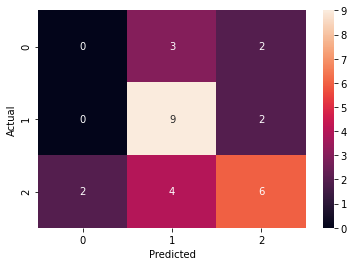

In [33]:
# building naive bayes model on DTM
naive_model_dtm = MultinomialNB()
naive_model_dtm.fit(train_X_dtm,train_Y)

predict_train = naive_model_dtm.predict(train_X_dtm)
predict_test = naive_model_dtm.predict(test_X_dtm)

len(predict_test)

print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

print('F1 Score on train: ',metrics.f1_score(train_Y,predict_train,average='weighted'))
print('F1 Score on test: ',metrics.f1_score(test_Y,predict_test,average='weighted'))

# predict probabilities on train and test
predict_prob_train = naive_model_dtm.predict_proba(train_X_dtm)[:,1]
predict_prob_test = naive_model_dtm.predict_proba(test_X_dtm)[:,1]

# print('ROC_AUC score on train: ',metrics.roc_auc_score(train_Y,predict_prob_train))
# print('ROC_AUC score on test: ',metrics.roc_auc_score(test_Y,predict_prob_test))

# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test)

cm_test

import seaborn as sns
sns.heatmap(cm_test,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Hyperparameter Tuning of the Model.

##### Parameters used

**alpha (float, default=1.0)**
- Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

**fit_prior (bool, default=True)**
- Whether to learn class prior probabilities or not. If false, a uniform prior will be used

In [34]:
parameter={'alpha':np.logspace(-3,3,10),'fit_prior':[True,False]}

clf = GridSearchCV(naive_model_dtm, parameter,cv=10)
clf.fit(train_X_dtm,train_Y)
clf.best_params_

{'alpha': 46.41588833612773, 'fit_prior': True}

Accuracy on train:  0.9553571428571429
Accuracy on test:  0.5357142857142857
F1 Score on train:  0.9539628566741447
F1 Score on test:  0.47760859829825336


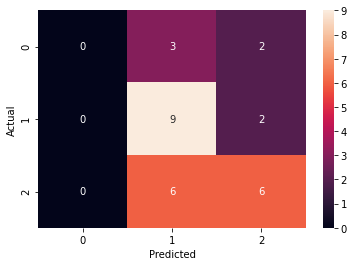

In [35]:
# building naive bayes model on DTM
naive_model_dtm = MultinomialNB(alpha=2.154434690031882,fit_prior=True)
naive_model_dtm.fit(train_X_dtm,train_Y)

predict_train = naive_model_dtm.predict(train_X_dtm)
predict_test = naive_model_dtm.predict(test_X_dtm)

len(predict_test)

print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

print('F1 Score on train: ',metrics.f1_score(train_Y,predict_train,average='weighted'))
print('F1 Score on test: ',metrics.f1_score(test_Y,predict_test,average='weighted'))

# predict probabilities on train and test
predict_prob_train = naive_model_dtm.predict_proba(train_X_dtm)[:,1]
predict_prob_test = naive_model_dtm.predict_proba(test_X_dtm)[:,1]

# print('ROC_AUC score on train: ',metrics.roc_auc_score(train_Y,predict_prob_train))
# print('ROC_AUC score on test: ',metrics.roc_auc_score(test_Y,predict_prob_test))

# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test)

cm_test

import seaborn as sns
sns.heatmap(cm_test,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy on train:  0.8660714285714286
Accuracy on test:  0.5357142857142857
F1 Score on train:  0.812174241767935
F1 Score on test:  0.4761535048802129


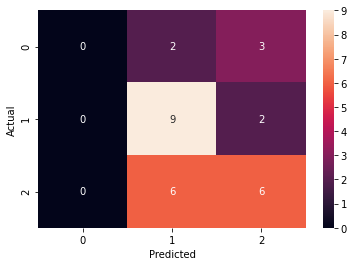

In [36]:
### Building Model on TDM

# building naive bayes model on DTM
naive_model = MultinomialNB()
naive_model.fit(train_X_tdm,train_Y)

predict_train = naive_model.predict(train_X_tdm)
predict_test = naive_model.predict(test_X_tdm)

len(predict_test)

print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

print('F1 Score on train: ',metrics.f1_score(train_Y,predict_train,average='weighted'))
print('F1 Score on test: ',metrics.f1_score(test_Y,predict_test,average='weighted'))

# predict probabilities on train and test
predict_prob_train = naive_model.predict_proba(train_X_tdm)[:,1]
predict_prob_test = naive_model.predict_proba(test_X_tdm)[:,1]


# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test)

cm_test

import seaborn as sns
sns.heatmap(cm_test,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
predict_prob_test = naive_model.predict_proba(test_X_tdm)

### Hyperparameter Tuning of the Model.

In [38]:
parameter={'alpha':np.logspace(-3,3,10),'fit_prior':[True,False]}

In [39]:
clf = GridSearchCV(naive_model, parameter,cv=10)
clf.fit(train_X_tdm,train_Y)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'fit_prior': [True, False]})

In [40]:
clf.best_params_

{'alpha': 0.46415888336127775, 'fit_prior': True}

Accuracy on train:  0.9821428571428571
Accuracy on test:  0.5357142857142857
F1 Score on train:  0.9817460317460317
F1 Score on test:  0.4761535048802129


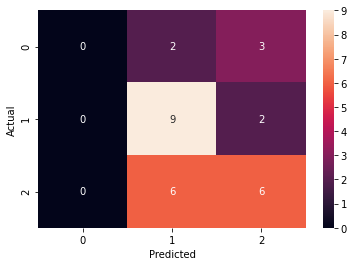

In [41]:
### Building Model on TDM

# building naive bayes model on DTM
naive_model = MultinomialNB(alpha=0.4641,fit_prior=True)
naive_model.fit(train_X_tdm,train_Y)

predict_train = naive_model.predict(train_X_tdm)
predict_test = naive_model.predict(test_X_tdm)

len(predict_test)

print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

print('F1 Score on train: ',metrics.f1_score(train_Y,predict_train,average='weighted'))
print('F1 Score on test: ',metrics.f1_score(test_Y,predict_test,average='weighted'))


# predict probabilities on train and test
predict_prob_train = naive_model.predict_proba(train_X_tdm)[:,1]
predict_prob_test = naive_model.predict_proba(test_X_tdm)[:,1]


# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test)

cm_test

import seaborn as sns
sns.heatmap(cm_test,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### We can see after tuning the hyperparameter model accuray has improved.